In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('../datasets/imdb_p6_sample.csv')
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import KFold

In [27]:
y=df['rating']
x=df.drop(['HA', 'rating', 'tconst', 'title'], axis=1)

In [13]:
KFold?

In [29]:
cv=KFold(len(df), n_folds=3, shuffle=True, random_state=42)
cv

sklearn.cross_validation.KFold(n=26, n_folds=3, shuffle=True, random_state=42)

Index of things going to training sets

In [30]:
for item in cv:
    print item

(array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 25]), array([ 0,  1,  8,  9, 11, 13, 16, 23, 24]))
(array([ 0,  1,  6,  7,  8,  9, 10, 11, 13, 14, 16, 18, 19, 20, 23, 24, 25]), array([ 2,  3,  4,  5, 12, 15, 17, 21, 22]))
(array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 21, 22, 23,
       24]), array([ 6,  7, 10, 14, 18, 19, 20, 25]))


In [62]:
def plot_things(y, x):
    plt.scatter(y, x)
    plt.plot([8, 9, 10], [8, 9, 10])
    plt.xlim((8,10))
    plt.ylim((8,10))
    plt.xlabel('Actual Y values')
    plt.ylabel('Predicted Values')
    plt.show()

In [65]:
def fit_evaluate_model(x_train, x_test, 
                       y_train, y_test,
                       model
                      ):
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    plot_things(y_test, predictions)
    return model.score(x_test, y_test)

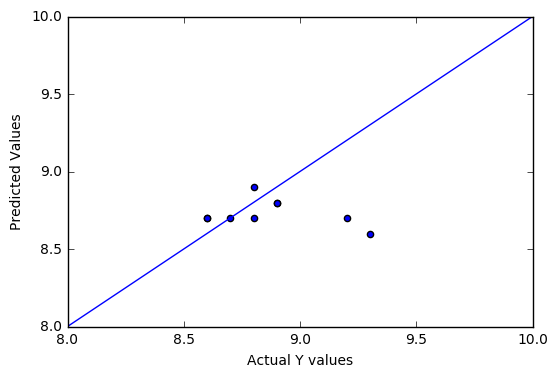

For fold 0, the score is: -0.666666666667


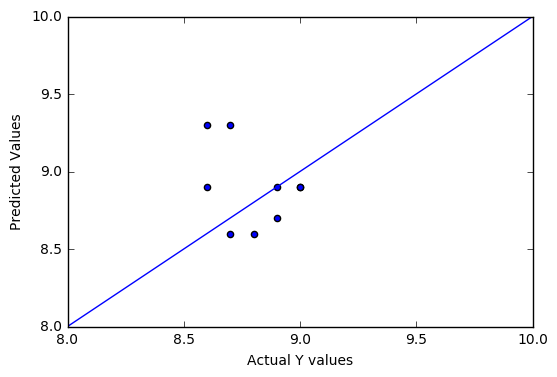

For fold 1, the score is: -4.25


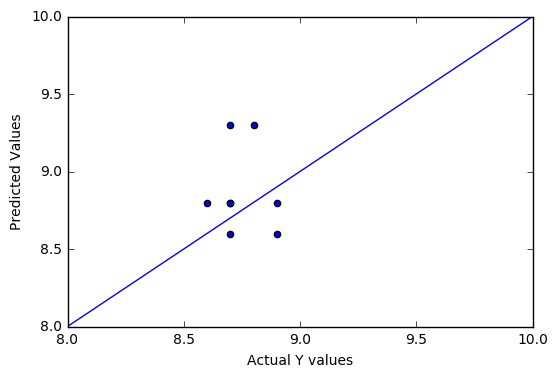

For fold 2, the score is: -8.75
The average score is -4.55555555556


In [66]:
counter = 0
set_of_scores=[]

for train_set, test_set in cv:
    x_train = x.as_matrix()[train_set]
    x_test = x.as_matrix()[test_set]
    y_train = y.as_matrix()[train_set]
    y_test = y.as_matrix()[test_set]
    
    model_score=fit_evaluate_model(x_train, x_test, 
                                   y_train, y_test, 
                                   DecisionTreeRegressor())

    print 'For fold %s, the score is: %s' % (counter, model_score)
    set_of_scores.append(model_score)
    counter+=1
# print set_of_scores
print 'The average score is %s' % np.mean(set_of_scores)
#     print '\n'

In [67]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

Testing for model: decision_tree


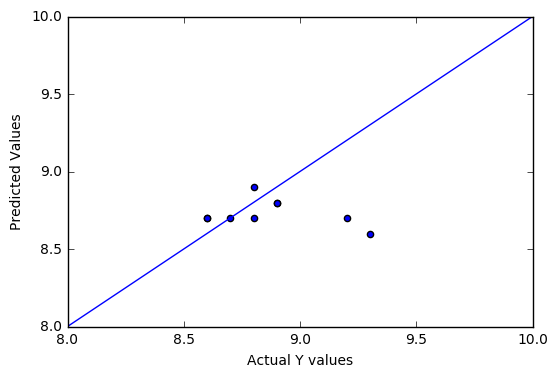

For fold 0, the score is: -0.666666666667


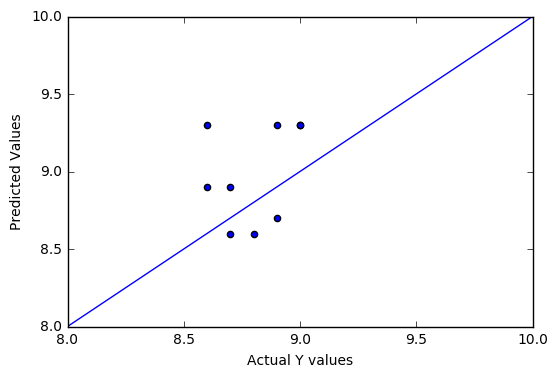

For fold 1, the score is: -4.25


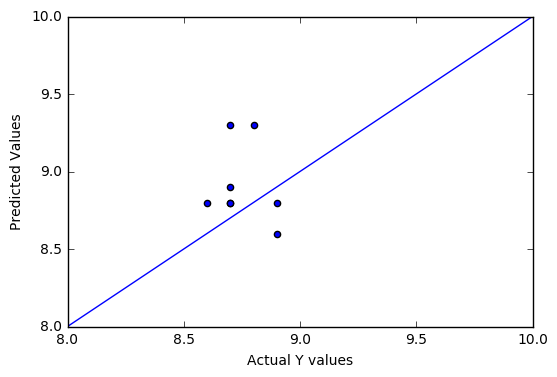

For fold 2, the score is: -9.125
The average score is -4.68055555556
Testing for model: ada_boost


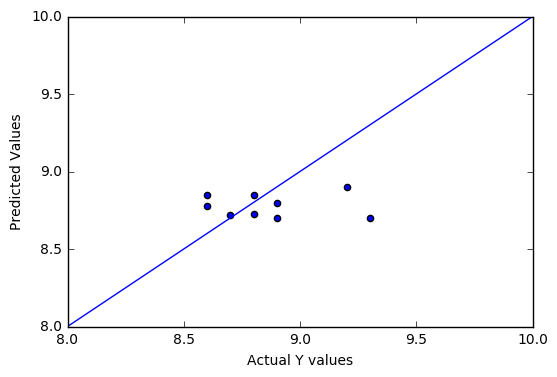

For fold 0, the score is: -0.256880787037


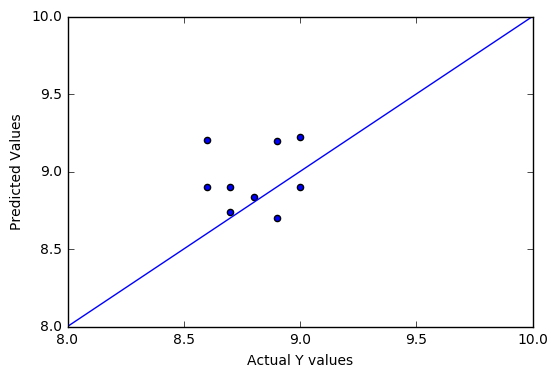

For fold 1, the score is: -2.4104691358


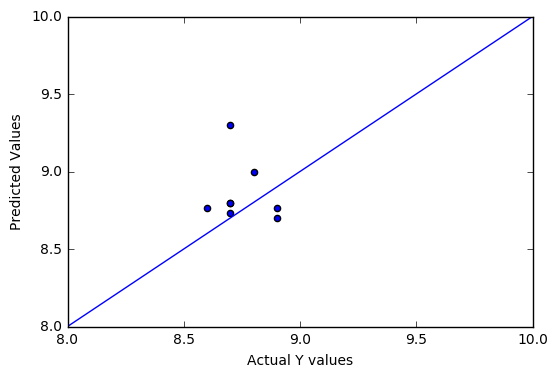

For fold 2, the score is: -5.33333333333
The average score is -2.66689441872
Testing for model: grad_boost


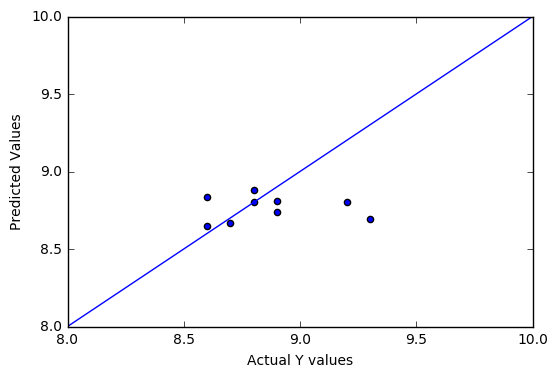

For fold 0, the score is: -0.298249816733


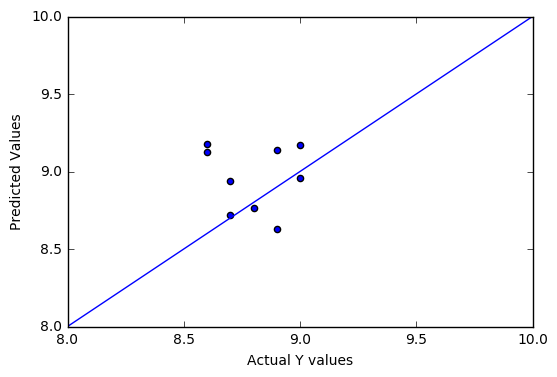

For fold 1, the score is: -3.15655190575


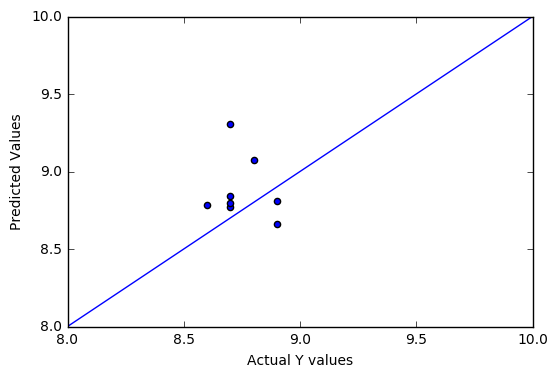

For fold 2, the score is: -6.18618276749
The average score is -3.21366149666
Testing for model: random_forest


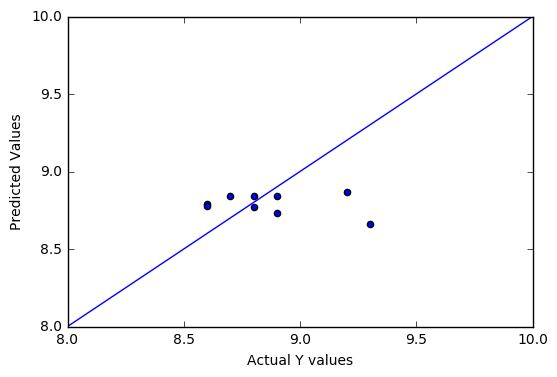

For fold 0, the score is: -0.336666666667


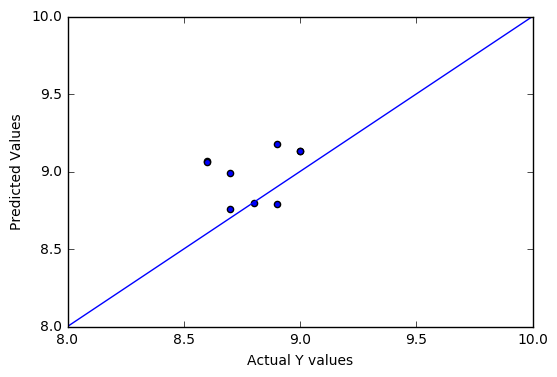

For fold 1, the score is: -2.2225


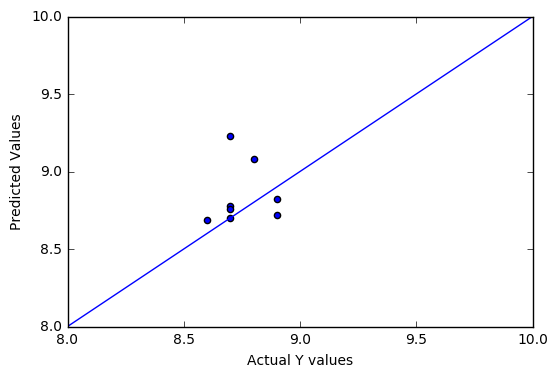

For fold 2, the score is: -4.2025
The average score is -2.25388888889


In [72]:

models = {
    'decision_tree':DecisionTreeRegressor(),
    'random_forest':RandomForestRegressor(),
    'ada_boost':AdaBoostRegressor(),
    'grad_boost':GradientBoostingRegressor()
}
for key, value in models.items():
    print "Testing for model: %s" % key
    counter = 0
    set_of_scores=[]

    for train_set, test_set in cv:
        x_train = x.as_matrix()[train_set]
        x_test = x.as_matrix()[test_set]
        y_train = y.as_matrix()[train_set]
        y_test = y.as_matrix()[test_set]

        model_score=fit_evaluate_model(x_train, x_test, 
                                       y_train, y_test, 
                                       value)

        print 'For fold %s, the score is: %s' % (counter, model_score)
        set_of_scores.append(model_score)
        counter+=1
    print 'The average score is %s' % np.mean(set_of_scores)
# print set_of_scores
#     print '\n'